In [67]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Logistic Regression Class (WORK IN PROGRESS MAKING IT MULTI-CLASSIFYING):


In [68]:
def logisticX(X):
    """
    Input:
        The features classes as a matrix of the  with shape (N,p-1)
    Ouput:
        The design matrix used in logistic regression with shape 
    Add 1s to the matrix of the features as the first column.
    """
    ONE = np.ones((X.shape[0])).reshape(X.shape[0],1)
    X = np.concatenate((ONE, X), axis=1)
    
    return X

# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector


In [519]:
def softmax(X, derivative=False):
    #print(np.max(X))
    out = np.exp(X-np.max(X))/np.sum(np.exp(X-np.max(X)))
    return out

class logisticmulticlass(object):
    
    def __init__(self, X, y, optimizer, learning_rate= 0.01, batch_size = 32, max_epoch=100):
        
        self.X = X
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        
    @staticmethod
    def sigmoid(X, derivative=False):
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out

    
    @staticmethod  
    def compute_cost(X, y, beta):
        # Computing the cost fucntion to see the how the effect of the learning_rate and the optimizer
        C = beta.shape[1]
        N = X.shape[0]
        print(C,N)
        #print("Beta matrix has C=",C)
        #if C>1:
            # Cost function for mutlticlass logistic regression
            #c_ind = np.argmax(y, axis=1) ?? and then evaulate the cost function for only the correct class?
            
            #cost = - y.T.dot(np.log(softmax(X.dot(beta))))
        #else:
            # Cross Entropy Cost Function BINARY
        print(y.T.shape,"transposed, and the sigmoid function of :", X.shape, beta.shape)
        sig = X.dot(beta)
        term1 = y.T.dot(sig)
        term2 = np.log(np.ones((N,C))+np.exp(sig) )
        print(term1.shape, term2.shape)

        cost = -np.sum(term1-term2)
        #cost = -np.sum( y.T.dot(sig)-np.log(np.ones((N,C))+np.exp(sig) ))
        return cost

    def fit(self,X,y):
        # Initializing beta as a matrix. Each row is corresponding to a model defining that class.
        C = y.shape[1]
        F = X.shape[1]
        self.beta = np.random.normal(0, 1, size=(X.shape[1], y.shape[1]))
        #print(self.beta.shape)
        # Intializing the cost  
        self.costs = []
        
        # Initializing the iterations
        self.iter_no = 0
        
        # Creatie randomized index for the batches
        N = X.shape[0] # This is amount of datapoints
        idx = np.arange(0,N)
        
        for epoch in range(self.max_epoch):
            # Randomizing the data for each epoch
            np.random.shuffle(idx)
            X = X[idx,:]
            y = y[idx,:]
            #print("y randomized shape", y.shape)            
            for i in range(0, N, self.batch_size):

                X_batch = X[i:i+self.batch_size,:]
                y_batch = y[i:i+self.batch_size,:]
                for c in range(0, C):
                    # Batch prediction 
                    y_batch_pred = logisticmulticlass.sigmoid(X_batch.dot(self.beta[:,c]))
                    
                    #print(y_batch[:,c].shape, y_batch_pred.shape)
                    #print(y_batch[:,c], y_batch_pred)
                    
                    # Calculating the gradient for 
                    gradient = -X_batch.T.dot(y_batch[:,c]-y_batch_pred)
                    #print(gradient.shape)
                    
                    # Updating Beta
                    self.beta[:,c] -= self.learning_rate*gradient 


            # Computing the cost after each epoch storing it (interesting to see with the different optimizers)
            print("Input into cost funciton: ", y.shape, X.shape, self.beta.shape)
            cost = self.compute_cost(X, y, self.beta)
            self.costs.append(cost)
        return self
    
    def predict(self,X):
        self.y_pred = logisticmulticlass.sigmoid(X.dot(self.beta))
        return self.y_pred

In [528]:
to_categorical_numpy(np.array([1,1,0,1,2]))

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


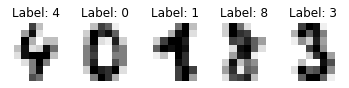

In [521]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)


for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


In [522]:
X = inputs
Y = to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [523]:
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [524]:
max_epoch = 100
batch_size = 30
learning_rate = 0.05
MULTI = logisticmulticlass(X_train_scaled, Y_train, optimizer=["SGD"],
                            learning_rate = learning_rate, 
                            batch_size = batch_size,
                            max_epoch=max_epoch)

In [525]:
MULTI.fit(X_train_scaled, Y_train)

Input into cost funciton:  (1437, 10) (1437, 64) (64, 10)
10 1437
(10, 1437) transposed, and the sigmoid function of : (1437, 64) (64, 10)
(10, 10) (1437, 10)


ValueError: operands could not be broadcast together with shapes (10,10) (1437,10) 

In [415]:
Y_test.shape

(360, 10)

In [416]:
Y_tilde = MULTI.predict(X_train_scaled)
Y_pred = MULTI.predict(X_test_scaled)

In [417]:
def accuracy(y,y_pred):
    y = np.argmax(y, axis=1) #Returns one-hot encoded vectors back to class integers
    y_pred = np.argmax(y_pred, axis=1)
    acc = np.sum(y==y_pred)/len(y)
    return acc

In [418]:
trainAcc = accuracy(Y_train, Y_tilde)
testAcc = accuracy(Y_test, Y_pred)
print("The Training accuracy of the multinomial logistic regression was: ", trainAcc)
print("The Test accuracy of the multinomial logistic regression was: ", testAcc)

The Training accuracy of the multinomial logistic regression was:  0.8524704244954767
The Test accuracy of the multinomial logistic regression was:  0.8111111111111111


In [419]:
MULTI.costs

[array([[15010.73412228, 16699.96708631, 17031.71575493, 16825.13913847,
         16922.51963412, 16489.61199958, 16500.27674318, 16405.69317968,
         16683.0440004 , 16761.82837431],
        [17633.35479332, 16642.35673416, 17142.38842153, 17422.34262304,
         17312.85669373, 17709.9887875 , 17668.14780638, 17866.57116427,
         17376.4958929 , 17348.21637498],
        [17103.74114772, 16993.48807156, 15638.43571756, 16742.7121661 ,
         16870.6354214 , 17045.21666905, 17136.66859005, 17350.27876923,
         16904.93846383, 16806.51745318],
        [17875.65061884, 17813.67488791, 17784.27598924, 16816.05192339,
         17885.70041779, 17712.02160455, 17995.36274459, 17986.11909162,
         17792.9598469 , 17746.18194567],
        [18051.51385286, 17856.08605394, 18183.87728166, 18471.90317894,
         16623.75198672, 18181.40359031, 17923.84305508, 17761.63284463,
         18087.0467049 , 18190.54062478],
        [17882.58930367, 17702.53094367, 17644.46044893, 176

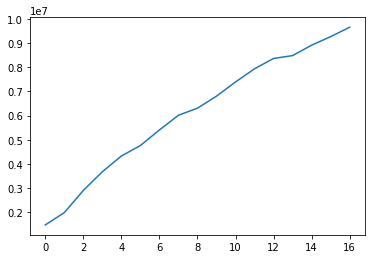

In [408]:
plt.plot(MULTI.costs)

In [156]:
class LogisticRegression(object):
    
    def __init__(self, X, y, optimizer, learning_rate= 0.01, batch_size = 32, max_epoch=100):
        
        self.X = X
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        
    @staticmethod
    def sigmoid(X, derivative=False):
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    
    @staticmethod  
    def compute_cost(X, y, beta):
        # Computing the cost fucntion to see the how the effect of the learning_rate and the optimizer
        
        # Cross Entropy Cost Function BINARY
        cost = -np.sum( y.dot(X.dot(beta))-np.log(np.ones(len(X))+np.exp(X.dot(beta))))
        
        # Cost function for mutlticlass logistic regression
        cost = -y.dot(np.log(softmax(X.dot(beta))))
        
        
        
        return cost
    
    @staticmethod      
    def accuracy(y,y_pred):
        acc = np.sum(y==np.round(y_pred))/len(y)
        return acc
    
    @staticmethod
    def softmax(X, derivative=False):
        # Softmax activation function
        # Returns two outputs:
        #   out[ind] : which is the maximum value
        #   ind      : which is the index of the maximum value (one hot index)
        if derivative == True:
            out = np.exp(X)/np.sum(np.exp(X))
        elif derivative == True:
            out = np.exp(X)/np.sum(np.exp(X))-1 
        # Out[ind] gives the first (if there are two equal value guesses), maximum value
        # of the softmax function.
        return out

    def fit(self,X,y):
        # Initializing beta 
        self.beta = np.random.standard_normal(X.shape[1])
        #self.beta = np.random.randn(0,1,size=(X.shape[1]))
        
        # Intializing the cost  
        self.costs = []
        
        # Initializing the iterations
        self.iter_no = 0
        # Creatie randomized index for the batches
        M = X.shape[0] # This is amount of datapoitns (??)
        idx = np.arange(0,M)
        
        for epoch in range(self.max_epoch):
            # Randomizing the data for each epoch
            np.random.shuffle(idx)
            X = X[idx,:]
            y = y[idx]
            
            for i in range(0, M, self.batch_size):
                self.iter_no = self.iter_no + i
                
                X_batch = X[i:i+self.batch_size,:]
                y_batch = y[i:i+self.batch_size]
                
                
                
                # Calculating the gradient
                gradient = -X_batch.T.dot(y_batch-LogisticRegression.sigmoid(X_batch.dot(self.beta)))
                
                # Updating Beta
                self.beta -= self.learning_rate*gradient 
                

            # Computing the cost after each epoch storing it (interesting to see with the different optimizers)
            #print(y.shape, X.shape, self.beta.shape)
            cost = self.compute_cost(X, y, self.beta)
            self.costs.append(cost)
        return self
    
    def predict(self,X):
        y_pred = LogisticRegression.sigmoid(X.dot(self.beta))
        return y_pred

In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [158]:
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [196]:
to_categorical_numpy(y_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [159]:
max_epoch = 1000
batch_size = 10
learning_rate = 0.05
logreg = LogisticRegression(X_train_scaled, y_train, optimizer=["SGD"],
                            learning_rate= learning_rate, batch_size = batch_size, max_epoch=max_epoch)

In [160]:
logreg.fit(X_train_scaled, y_train)

In [161]:
costlog=logreg.costs
print(len(costlog))

1000


In [162]:
max_epoch-np.sum(np.isnan(costlog))

1000

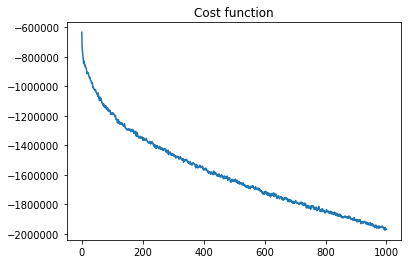

In [163]:
import matplotlib.pyplot as plt
plt.plot(np.arange(max_epoch),costlog)
plt.title("Cost function")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [171]:
y_tilde = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)

In [169]:
def accuracy(y,y_pred):
    acc = np.sum(y==np.round(y_pred))/len(y)
    return acc

In [170]:
accuracy(y_test, y_pred)

0.9370629370629371

In [174]:
accuracy(y_train, y_tilde)

0.9906103286384976

In [194]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# The maximum likelihood for the data set $D$ given the parameter $\hat{\beta}$
$P(D|\hat{\beta}) = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}$

# The cost function for logistic regression is given as the negative log of the MLE
# $\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\hat{\beta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\hat{\beta}))\right]\right)$
# And its derivative (in vector notation):
# $\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right) $


# Loading the MNIST data base
## There are 1797 images of size 8x8 pixels in "grayscale"

In [175]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

"""
for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()
"""

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


'\nfor i, image in enumerate(digits.images[random_indices]):\n    plt.subplot(1, 5, i+1)\n    plt.axis(\'off\')\n    plt.imshow(image, cmap=plt.cm.gray_r, interpolation=\'nearest\')\n    plt.title("Label: %d" % digits.target[random_indices[i]])\nplt.show()\n'

In [176]:
X_train, X_test, Y_train, Y_tes = train_test_split(inputs, labels, test_size = 0.2)

In [177]:
print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

Number of training images: 1437
Number of test images: 360


In [179]:
# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector


In [182]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [192]:
to_categorical_numpy(labels)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])